# Task 1

**1. ¿Qué pasa si algunas acciones tienen probabilidades de cero?**



**2. ¿Qué pasa si la póliza es determinística? π1(a) = 1 para algún a**

**3. Investigue y defina a qué se le conoce como cada uno de los siguientes términos, asegúrese de definir en qué consiste cada una de estas variaciones y cómo difieren de los k-armed bandits**

1. Contextual bandits 
2. Dueling bandits 
3. Combination bandits

---

# Task 2

In [117]:
import random

In [118]:
random.seed(42)  # Fijar semilla para reproducibilidad

In [119]:
class Bandit:
    """
    Entorno de 10 brazos, cada uno con probabilidad fija de recompensa.
    """
    def __init__(self, k: int = 10):
        self.k = k
        # Probabilidades reales de cada brazo (aleatorias entre 0 y 1)
        self.probs = [random.random() for _ in range(k)]

    def pull(self, arm: int) -> int:
        """
        Devuelve 1 con probabilidad probs[arm], 0 en caso contrario.
        """
        return 1 if random.random() < self.probs[arm] else 0

In [120]:
class Agent:
    """
    Agente ε-greedy para Multi‑Armed Bandits.
    """
    def __init__(self, k: int = 10, epsilon: float = 0.1):
        # Número de brazos y parámetro de exploración
        self.k = k
        self.epsilon = epsilon
        # Conteo de extracciones por brazo
        self.counts = [0] * k
        # Recompensas estimadas (Q) para cada brazo
        self.values = [0.0] * k

    def select_arm(self) -> int:
        """
        Con probabilidad ε: explora (brazo aleatorio).
        Con probabilidad 1−ε: explota (brazo de mayor valor estimado).
        """
        if random.random() < self.epsilon:
            return random.randrange(self.k)
        else:
            # Elige el índice del brazo con mayor Q
            return max(range(self.k), key=lambda i: self.values[i])

    def update_estimates(self, arm: int, reward: int):
        """
        Actualiza el valor estimado Q[arm] con la media incremental:
        Q ← Q + (1/n)·(reward − Q)
        """
        # Incrementar contador
        self.counts[arm] += 1
        n = self.counts[arm]
        # Actualizar media
        self.values[arm] += (reward - self.values[arm]) / n

In [121]:
# Parámetro de exploración
epsilon = 0.1

In [122]:
# Crear el agente con 10 brazos y ε = 0.1
agent = Agent(k=10, epsilon=epsilon)

In [123]:
# Verificar estado inicial
print("ε =", agent.epsilon)
print("Valores estimados:", agent.values)   # [0.0, 0.0, ..., 0.0]
print("Conteos de pulls:   ", agent.counts)   # [0, 0, ..., 0]

ε = 0.1
Valores estimados: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Conteos de pulls:    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [124]:
# Inicializar entorno Bandit y agente ε-greedy
bandit = Bandit(k=10)
agent = Agent(k=10, epsilon=0.1)

In [125]:
print("Probabilidades reales:", bandit.probs)

Probabilidades reales: [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, 0.029797219438070344]


---

**Ejecucion de 1000 iteraciones**


In [126]:
# Simulación de 1,000 iteraciones
num_iterations = 1000
rewards = []  # Guarda la recompensa obtenida en cada iteración

for _ in range(num_iterations):
    arm = agent.select_arm()                # Selecciona un brazo
    reward = bandit.pull(arm)               # Obtiene recompensa del entorno
    agent.update_estimates(arm, reward)     # Actualiza estimación del agente
    rewards.append(reward)                  # Guarda la recompensa

In [127]:
# Recompensa acumulada al final
print("Recompensa acumulada:", sum(rewards))

Recompensa acumulada: 840


---
**Graficación de Resultados**

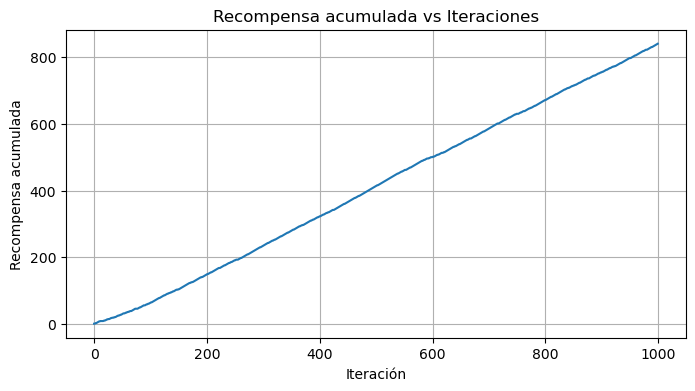

In [128]:
import matplotlib.pyplot as plt

# Recompensa acumulada en cada iteración
cumulative_rewards = [sum(rewards[:i+1]) for i in range(len(rewards))]

plt.figure(figsize=(8, 4))
plt.plot(cumulative_rewards)
plt.xlabel("Iteración")
plt.ylabel("Recompensa acumulada")
plt.title("Recompensa acumulada vs Iteraciones")
plt.grid(True)
plt.show()

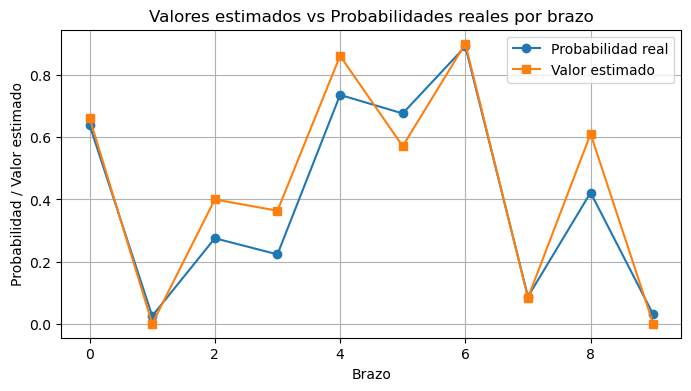

In [129]:
import numpy as np

plt.figure(figsize=(8, 4))
plt.plot(bandit.probs, 'o-', label='Probabilidad real')
plt.plot(agent.values, 's-', label='Valor estimado')
plt.xlabel("Brazo")
plt.ylabel("Probabilidad / Valor estimado")
plt.title("Valores estimados vs Probabilidades reales por brazo")
plt.legend()
plt.grid(True)
plt.show()

---
**Experimentación con diferentes valores epsilon**

In [130]:
def run_bandit_experiment(epsilon_list, num_iterations=1000):
    import matplotlib.pyplot as plt
    import numpy as np

    for epsilon in epsilon_list:
        # Fijar semilla para reproducibilidad en cada experimento
        random.seed(42)
        # Inicializar entorno y agente
        bandit = Bandit(k=10)
        agent = Agent(k=10, epsilon=epsilon)
        rewards = []

        # Simulación
        for _ in range(num_iterations):
            arm = agent.select_arm()
            reward = bandit.pull(arm)
            agent.update_estimates(arm, reward)
            rewards.append(reward)

        cumulative_rewards = [sum(rewards[:i+1]) for i in range(len(rewards))]

        # Crear dos gráficas lado a lado
        fig, axs = plt.subplots(1, 2, figsize=(14, 4))

        # Gráfica de recompensa acumulada
        axs[0].plot(cumulative_rewards)
        axs[0].set_xlabel("Iteración")
        axs[0].set_ylabel("Recompensa acumulada")
        axs[0].set_title(f"Recompensa acumulada\n(epsilon={epsilon})")
        axs[0].grid(True)

        # Gráfica de valores estimados vs probabilidades reales
        axs[1].plot(bandit.probs, 'o-', label='Probabilidad real')
        axs[1].plot(agent.values, 's-', label='Valor estimado')
        axs[1].set_xlabel("Brazo")
        axs[1].set_ylabel("Probabilidad / Valor estimado")
        axs[1].set_title(f"Valores estimados vs Probabilidades reales\n(epsilon={epsilon})")
        axs[1].legend()

In [131]:
# Lista de valores epsilon a probar
epsilon_list = [0.01, 0.1, 0.5]

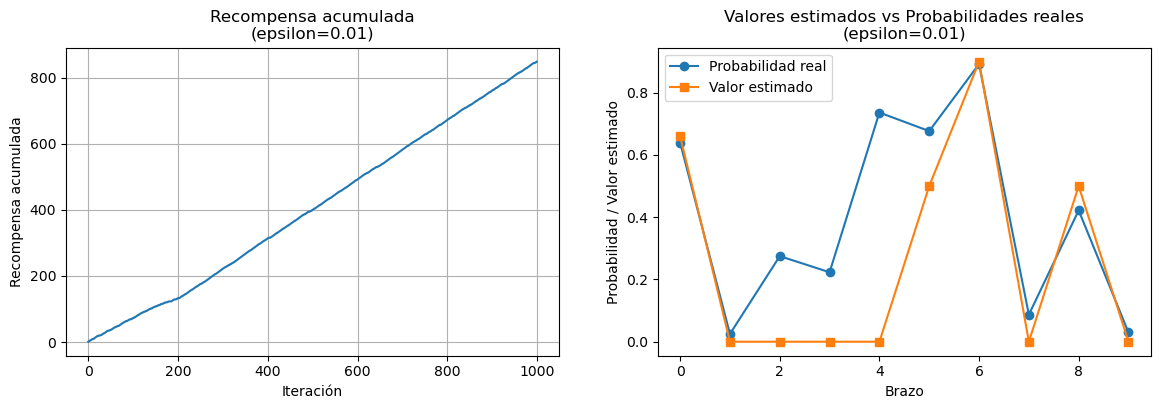

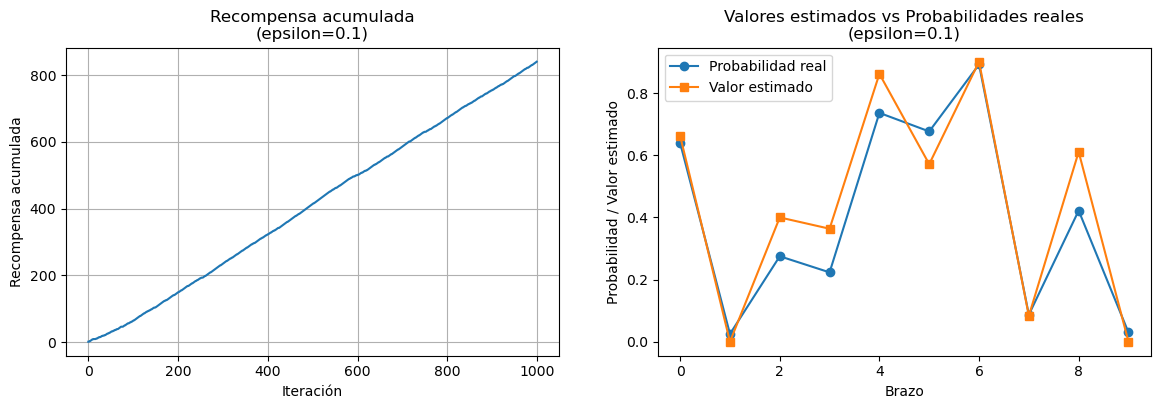

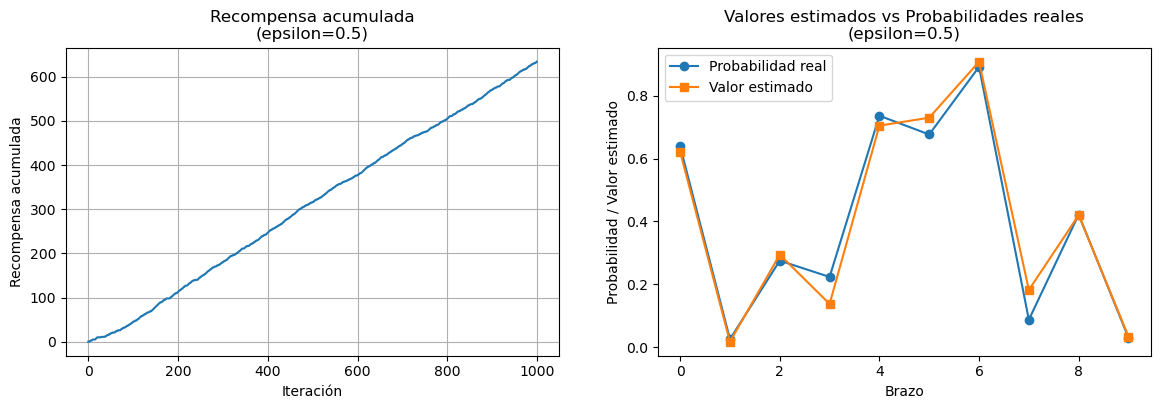

In [132]:
# Ejecutar experimentos
run_bandit_experiment(epsilon_list)